# Contents:
* File input/output:              **scipy.io**
* Special functions:              **scipy.special**
* Linear algebra operations:      **scipy.linalg**
* Interpolation:                  **scipy.interpolate**
* Optimization and fit:           **scipy.optimize**
* Statistics and random numbers:  **scipy.stats**
* Numerical integration:          **scipy.integrate**
* Fast Fourier transforms:        **scipy.fftpack**
* Signal processing:              **scipy.signal**
* Image manipulation:             **scipy.ndimage**

In [12]:
import numpy as np
# import scipy as sp

## File input/output: scipy.io

In [13]:
a = np.ones((3, 3))
a

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [14]:
from scipy import io as spio

spio.savemat('data/file.mat', {'a':a})  # savemat expects a dictionary


In [15]:
data = spio.loadmat('data/file.mat')
data['a']

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

**Python / Matlab mismatches, eg matlab does not represent 1D arrays**

In [16]:
a = np.ones(3)
a

array([ 1.,  1.,  1.])

In [17]:
spio.savemat('data/file.mat', {'a':a})
spio.loadmat('data/file.mat')['a']

array([[ 1.,  1.,  1.]])

**Image files: Reading images:**

In [18]:
from scipy import misc

misc.imread('data/elephant.png')

AttributeError: module 'scipy.misc' has no attribute 'imread'

## Special functions: scipy.special

**Frequently used special functions are:**

* **Bessel function, such as scipy.special.jn() (nth integer order Bessel function)**
* **Elliptic function (scipy.special.ellipj() for the Jacobian elliptic function, …)**
* **Gamma function: scipy.special.gamma(), also note scipy.special.gammaln() which will give the log of Gamma to a higher numerical precision.**
* **Erf, the area under a Gaussian curve: scipy.special.erf()**

## Linear algebra operations: scipy.linalg

* The **scipy.linalg.det()** function computes the determinant of a square matrix:

In [20]:
from scipy import linalg

a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [21]:
linalg.det(a)

-2.0

* The **scipy.linalg.inv()** function computes the inverse of a square matrix:

In [22]:
ia = linalg.inv(a)
ia

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [24]:
# singular matrix
a = np.array([[3, 2], [6, 4]])

linalg.inv(a)   # will give error

LinAlgError: singular matrix

* More advanced operations are available, for example **singular-value decomposition (SVD):**

In [25]:
a = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
a

array([[1, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

In [27]:
uarr, spec, vharr = linalg.svd(a)

In [28]:
uarr

array([[-0.1617463 , -0.98659196,  0.02178164],
       [-0.47456365,  0.09711667,  0.87484724],
       [-0.86523261,  0.13116653, -0.48390895]])

In [29]:
spec

array([ 14.88982544,   0.45294236,   0.29654967])

In [30]:
vharr

array([[-0.45513179, -0.54511245, -0.70406496],
       [ 0.20258033,  0.70658087, -0.67801525],
       [-0.86707339,  0.45121601,  0.21115836]])

The original matrix can be re-composed by matrix multiplication of the outputs of svd with np.dot:

In [31]:
sarr = np.diag(spec)
sarr

array([[ 14.88982544,   0.        ,   0.        ],
       [  0.        ,   0.45294236,   0.        ],
       [  0.        ,   0.        ,   0.29654967]])

In [32]:
svd_mat = uarr.dot(sarr).dot(vharr)
svd_mat

array([[ 1.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  9.]])

SVD is commonly used in statistics and signal processing. Many other standard decompositions (QR, LU, Cholesky, Schur), as well as solvers for linear systems, are available in scipy.linalg.

## Interpolation: scipy.interpolate
scipy.interpolate is useful for fitting a function from experimental data and thus evaluating points where no measure exists

In [33]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1)*1e-1
measures = np.sin(2*np.pi*measured_time) + noise

measures

array([ 0.00591326,  0.59138285,  0.93204355,  0.85413506,  0.35152485,
       -0.28409818, -0.83520658, -1.02711152, -0.60465102,  0.08619215])

**scipy.interpolate.interp1d** can build a linear (1D) interpolation function:
**scipy.interpolate.interp2d** for 2D

In [38]:
from scipy.interpolate import interp1d

linear_interp = interp1d(measured_time, measures)



In [39]:
interpolation_time = np.linspace(0, 1, 50)

linear_res = linear_interp(interpolation_time)

cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_res = cubic_interp(interpolation_time)


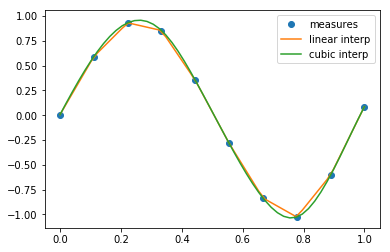

In [40]:
# Plot the data and the interpolation

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_res, label='linear interp')
plt.plot(interpolation_time, cubic_res, label='cubic interp')

plt.legend()

plt.show()

## Optimization and fit: scipy.optimize

Optimization is the problem of finding a numerical solution to a minimization or equality.

The **scipy.optimize** module provides algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.

In [42]:
from scipy import optimize

### Curve fitting

First generate some data

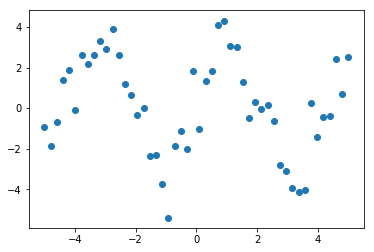

In [48]:
# Seed the random number generator for reproducibility
np.random.seed(0)

x = np.linspace(-5, 5, num=50)
y = 2.9 * np.sin(1.5*x) + np.random.normal(size=50)

plt.figure(figsize=(6, 4))
plt.scatter(x, y)

plt.show()


Now fit a simple sine function to the data

In [49]:
def test_func(x, a, b):
    return a*np.sin(b*x)

params, params_covariance = optimize.curve_fit(test_func, x, y, p0=[2, 2])

params

array([ 3.05931973,  1.45754553])

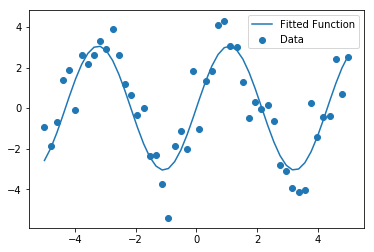

In [50]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='Data')
plt.plot(x, test_func(x, params[0], params[1]), label='Fitted Function')

plt.legend(loc='best')

plt.show()

### Finding the minimum of a scalar function

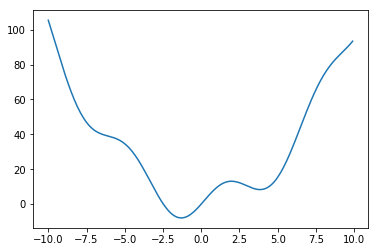

In [52]:
%matplotlib inline

def func(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, func(x))


In [53]:
print(optimize.minimize(func, x0=0))

      fun: -7.945823375615215
 hess_inv: array([[ 0.08589237]])
      jac: array([ -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])


**Methods:** As the function is a smooth function, gradient-descent based methods are good options. The **lBFGS algorithm** is a good choice in general:


In [57]:
print(optimize.minimize(func, x0=0, method="L-BFGS-B"))

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.42108547e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([-1.30644013])


### Finding the roots of a scalar function

In [61]:
root = optimize.root(func, x0=1)   # initial guess = 1
root

    fjac: array([[-1.]])
     fun: array([ 0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([  1.33310463e-32])
       r: array([-10.])
  status: 1
 success: True
       x: array([ 0.])

Note that only one root is found. Inspecting the plot of f reveals that there is a second root around -2.5. We find the exact value of it by adjusting our initial guess:

In [62]:
root2 = optimize.root(func, x0=-2.5)   # initial guess = 1
root2

    fjac: array([[-1.]])
     fun: array([ -1.77635684e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([ -4.42496706e-10])
       r: array([ 12.84593])
  status: 1
 success: True
       x: array([-2.47948183])

### Finally, Minima and roots of a function

**Define the function**

In [63]:
x = np.arange(-10, 10, 0.1)
def f(x):
    return x**2 + 10*np.sin(x)


**Find minima**

In [64]:
# Global optimization
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid, ))
print("Global minima found %s" % xmin_global)


# Constrain optimization
xmin_local = optimize.fminbound(f, 0, 10)
print("Local minimum found %s" % xmin_local)


Global minima found [-1.30641113]
Local minimum found 3.8374671195


**Root finding**

In [66]:
root = optimize.root(f, 1)  # initial guess is 1
print("First root found %s" % root.x)

root2 = optimize.root(f, -2.5)
print("Second root found %s" % root2.x)

First root found [ 0.]
Second root found [-2.47948183]


**Plot function, minima, and roots**

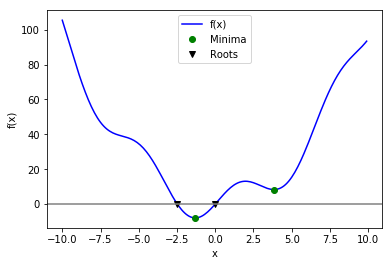

In [67]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot the function
ax.plot(x, f(x), 'b-', label="f(x)")

# Plot the minima
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")

# Plot the roots
roots = np.array([root.x, root2.x])
ax.plot(roots, f(roots), 'kv', label="Roots")

# Decorate the figure
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.axhline(0, color='gray')


## Statistics and random numbers: scipy.stats

### Distributions: histogram and probability density function

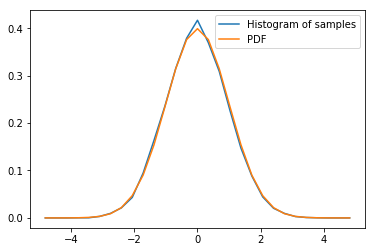

In [68]:
# Sample from a normal distribution using numpy's random number generator
samples = np.random.normal(size=10000)

# Compute a histogram of the sample
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(samples, bins=bins, normed=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object
from scipy import stats

pdf = stats.norm.pdf(bin_centers)

plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()


### Mean, median and percentiles

In [70]:
np.mean(samples)

-0.018612696672392782

In [71]:
np.median(samples)

-0.027616349601742113

The median is also the percentile 50, because 50% of the observation are below it:

In [72]:
stats.scoreatpercentile(samples, 50)

-0.027616349601742113

Similarly, we can calculate the percentile 90:

In [73]:
stats.scoreatpercentile(samples, 90)

1.254569909432719

### Statistical tests

A statistical test is a decision indicator. For instance, if we have two sets of observations, that we assume are generated from Gaussian processes, we can use a **T-test** to decide whether the means of two sets of observations are significantly different:

In [74]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)

stats.ttest_ind(a, b)

Ttest_indResult(statistic=-4.0340708688697351, pvalue=0.00010254896589236927)

## Numerical integration: scipy.integrate

### Function integrals
The most generic integration routine is **scipy.integrate.quad()**. To compute $\int_0^{\pi / 2} sin(t) dt$:

In [75]:
from scipy.integrate import quad

res, err = quad(np.sin, 0, np.pi/2)
res, err

(0.9999999999999999, 1.1102230246251564e-14)

Other integration schemes are available: **scipy.integrate.fixed_quad(), scipy.integrate.quadrature(), scipy.integrate.romberg()…**

### Integrating differential equations

**scipy.integrate** also features routines for integrating Ordinary Differential Equations (ODE). In particular, **scipy.integrate.odeint()** solves ODE of the form: dy/dt = rhs(y1, y2, .., t0,...)

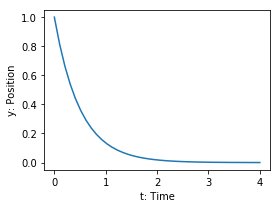

In [77]:
def calc_derivative(ypos, time):
    return -2*ypos

from scipy.integrate import odeint

time_vec = np.linspace(0, 4, 40)
y = odeint(calc_derivative, y0=1, t=time_vec)


plt.figure(figsize=(4, 3))
plt.plot(time_vec, y)
plt.xlabel('t: Time')
plt.ylabel('y: Position')
plt.tight_layout()


## Fast Fourier transforms: scipy.fftpack
The **scipy.fftpack** module computes fast Fourier transforms (FFTs) and offers utilities to handle them. The main functions are:

* **scipy.fftpack.fft()** to compute the FFT
* **scipy.fftpack.fftfreq()** to generate the sampling frequencies
* **scipy.fftpack.ifft()** computes the inverse FFT, from frequency space to signal space

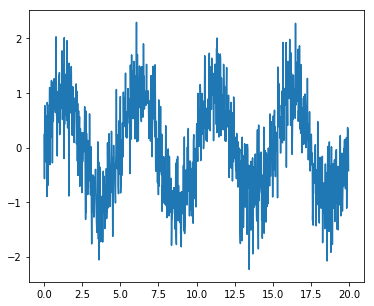

In [80]:
from scipy import fftpack

# Seed the random number generator
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))


plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')



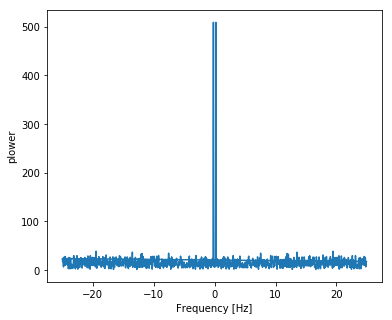

In [81]:
# The FFT of the signal
sig_fft = fftpack.fft(sig) 

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')


## Signal processing: scipy.signal

**scipy.signal** is for typical signal processing: 1D, regularly-sampled signals.



### Resampling
**scipy.signal.resample():** resample a signal to n points using FFT.

In [82]:
# Generate a signal with 100 data point

t = np.linspace(0, 5, 100)
x = np.sin(t)


In [83]:
# Downsample it by a factor of 4

from scipy import signal
x_resampled = signal.resample(x, 25)

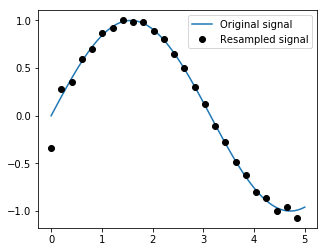

In [84]:
# plot

plt.figure(figsize=(5, 4))
plt.plot(t, x, label='Original signal')
plt.plot(t[::4], x_resampled, 'ko', label='Resampled signal')

plt.legend(loc='best')


### Detrending 
**scipy.signal.detrend():** remove linear trend from signal:

In [85]:
# Generate a random signal with a trend

t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

In [86]:
# Detrend

from scipy import signal
x_detrended = signal.detrend(x)

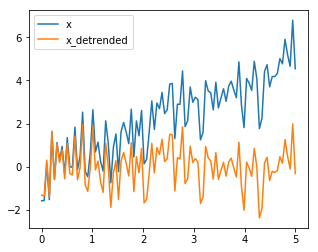

In [87]:
# Plot

plt.figure(figsize=(5, 4))
plt.plot(t, x, label="x")
plt.plot(t, x_detrended, label="x_detrended")
plt.legend(loc='best')
plt.show()


### Filtering:
For non-linear filtering, **scipy.signal** has filtering (median filter **scipy.signal.medfilt()**, Wiener **scipy.signal.wiener())**.

scipy.signal also has a full-blown set of tools for the design of linear filter (finite and infinite response filters).

### Spectral analysis: 
**scipy.signal.spectrogram()** compute a spectrogram –frequency spectrums over consecutive time windows–, while **scipy.signal.welch()** computes a power spectrum density (PSD).

## Image manipulation: scipy.ndimage
**scipy.ndimage** provides manipulation of n-dimensional arrays as images.